# <b>(Introduction to AI), Spring 2021</b>



### In this assignment I used the following:
### Linear Regresssion
### Principal Component Analysis
### K-fold Cross Validation

##  <u>References and sources </u>

https://www.geeksforgeeks.org/python-get-unique-values-list/

https://stackoverflow.com/questions/42521772/importerror-no-module-named-plotly-plotly-in-linuxmint17-3

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix

##  <u>Solution</u>

#### Code the solution

In [1]:
import pandas as pd
import numpy as np

### importing the data

In [2]:
dt=pd.read_csv(r'C:\Users\gursi\Desktop\CS 156\CS 156\Assignment\Assignment 4\homework4_input_data.csv')
dt.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [3]:
#to see all the different type of cancer

from collections import Counter

Counter(dt['Class'].tolist())

#in this there are 12 different type of cancer


Counter({'Leukemia': 102,
         'Bladder': 327,
         'Breast': 875,
         'Colon': 370,
         'Glioblastoma': 117,
         'Head&Neck': 415,
         'Kidney': 420,
         'LungAdeno': 424,
         'LungSquamous': 390,
         'Ovarian': 337,
         'Rectal': 128,
         'Uterine': 431})

In [4]:
dz= dt.drop(['id','Class'],axis=1)



In [5]:
dz.head()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
0,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,0.202624,...,4.458889,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923
1,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,0.449673,...,4.322699,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838
2,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,1.624238,...,3.769234,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553
3,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,0.326149,...,4.553598,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830
4,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,1.658433,...,3.937198,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553


### Principal Component Analysis

In [6]:
#visulaization of the data with original dimensions -  we use scatter plot matrix

import plotly.express as px  # install plotly first using pip install plotly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca1_new=pca.fit_transform(dz)


#np.shape(pca1_new)[0]

#here we are creating a new dataframe of pca values
principalDf = pd.DataFrame(data = pca1_new, columns = ['PCA1', 'PCA2'])
principalDf.head()

Dz = pd.concat([principalDf, dt[['Class']]], axis = 1)

Dz.head()

,PCA1,PCA2,Class
0,82.045989,46.713051,Leukemia
1,76.722516,37.919092,Leukemia
2,76.643207,39.867655,Leukemia
3,74.817224,36.351105,Leukemia
4,79.694765,43.781020,Leukemia


#### Plotting the PCA

In [7]:
Class = ["Breast", "Bladder", "Colon" ,"Glioblastoma","Head&Neck", "Kidney","Leukemia","LungAdeno","LungSquamous","Ovarian","Rectal", "Uterine"]

colors = ['#4287f5','#19c5e3', '#80d941','#179933','#f07e78','#f01e13','#f0841f','#db5209','#ce8ced','#551075','#e3d329', '#cc3423']

Breast
Bladder
Colon
Glioblastoma
Head&Neck
Kidney
Leukemia
LungAdeno
LungSquamous
Ovarian
Rectal
Uterine


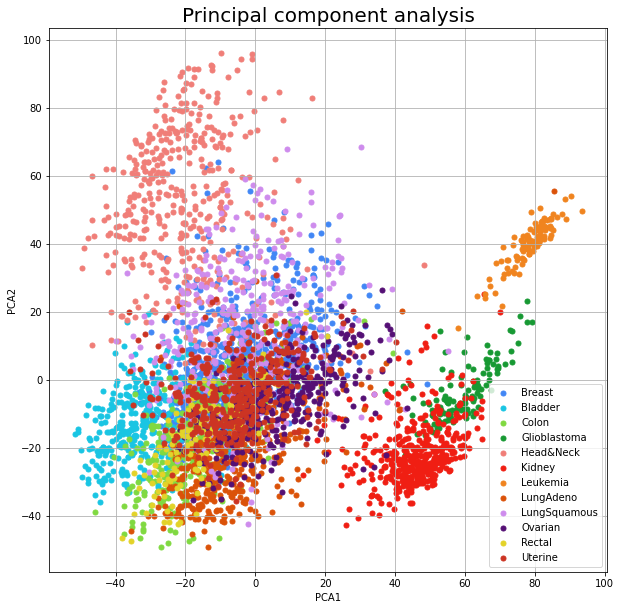

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)     
ax.set_xlabel('PCA1', fontsize = 10)
ax.set_ylabel('PCA2', fontsize = 10)
ax.set_title('Principal component analysis', fontsize = 20)

for class1, color in zip(Class,colors):
    print(class1)
    indicesToKeep = Dz['Class'] == class1  # here only those indices will come as true  according to that given in Class
    #print(indicesToKeep)
    ax.scatter(Dz.loc[indicesToKeep, 'PCA1'], Dz.loc[indicesToKeep, 'PCA2'] , c = color, s = 25)
ax.legend(Class)
ax.grid()

### Normalizing the data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_rescaled=scaler.fit_transform(dz)

print(len(X_rescaled))

4336


In [28]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_rescaled,dt['Class'],test_size =0.2 , random_state = 0, stratify =dt['Class'])
Xtrain.shape,Ytrain.shape

Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape
y1=Ytrain.to_numpy() # for cross validation we need Ytrain to be in numpy array
print(Xtrain.shape)

(3468, 3000)


### Cross Validation

In [29]:
from sklearn.svm import LinearSVC 
model = LinearSVC(multi_class='ovr',class_weight='balanced')


In [30]:
from sklearn.model_selection import KFold
# KFold(n_splits=10).get_n_splits(X_rescaled)
kfolds = KFold(n_splits =5)

for train_indices, validation_indices in kfolds.split(Xtrain):
    #print("Training indices: "+str(train_indices))
    #print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = Xtrain[train_indices], Xtrain[validation_indices]
   # Ytrain[validation_indices]
    Y_train_set, Y_validation_set = y1[train_indices], y1[validation_indices] #here pandas column is used as an array form else if it be in pandas column so error occur
    model.fit( X_train_set,Y_train_set)
    print(model.score(X_validation_set,Y_validation_set))
  

# here KFold method divide the kinto kfolds and return 2 parameter : 1) indices of train set, indices of validation set

    

0.9639769452449568
0.9654178674351584
0.9610951008645533
0.9624819624819625
0.9682539682539683


In [31]:
y_pred=model.predict(Xtest)
print(model.score(Xtest,Ytest))

0.9700460829493087


In [32]:
from sklearn.metrics import plot_confusion_matrix

#print(plot_confusion_matrix(Ytest, y_pred))



In [33]:
plt.show()

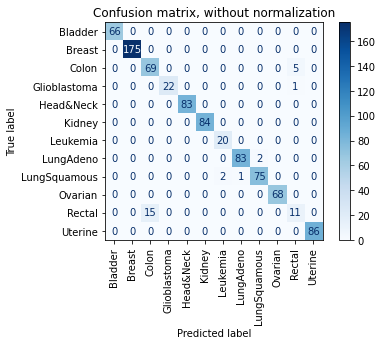

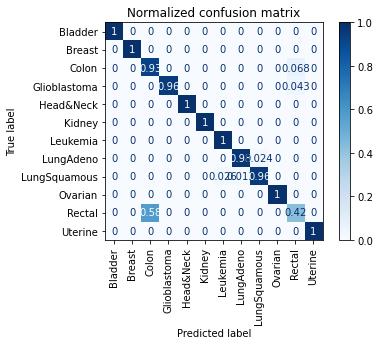

In [34]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, Xtest, Ytest, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation='vertical')
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()